<a href="https://colab.research.google.com/github/21AJA/Iris-Flower-Classification/blob/main/Housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
df = pd.read_csv(r'/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype == 'int64']

In [17]:
for col in cat_cols:
    print('='*50)
    print(col)
    print('-'*50)
    print(df[col].value_counts())

mainroad
--------------------------------------------------
yes    468
no      77
Name: mainroad, dtype: int64
guestroom
--------------------------------------------------
no     448
yes     97
Name: guestroom, dtype: int64
basement
--------------------------------------------------
no     354
yes    191
Name: basement, dtype: int64
hotwaterheating
--------------------------------------------------
no     520
yes     25
Name: hotwaterheating, dtype: int64
airconditioning
--------------------------------------------------
no     373
yes    172
Name: airconditioning, dtype: int64
prefarea
--------------------------------------------------
no     417
yes    128
Name: prefarea, dtype: int64
furnishingstatus
--------------------------------------------------
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [18]:
cat_cols, num_cols

(['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

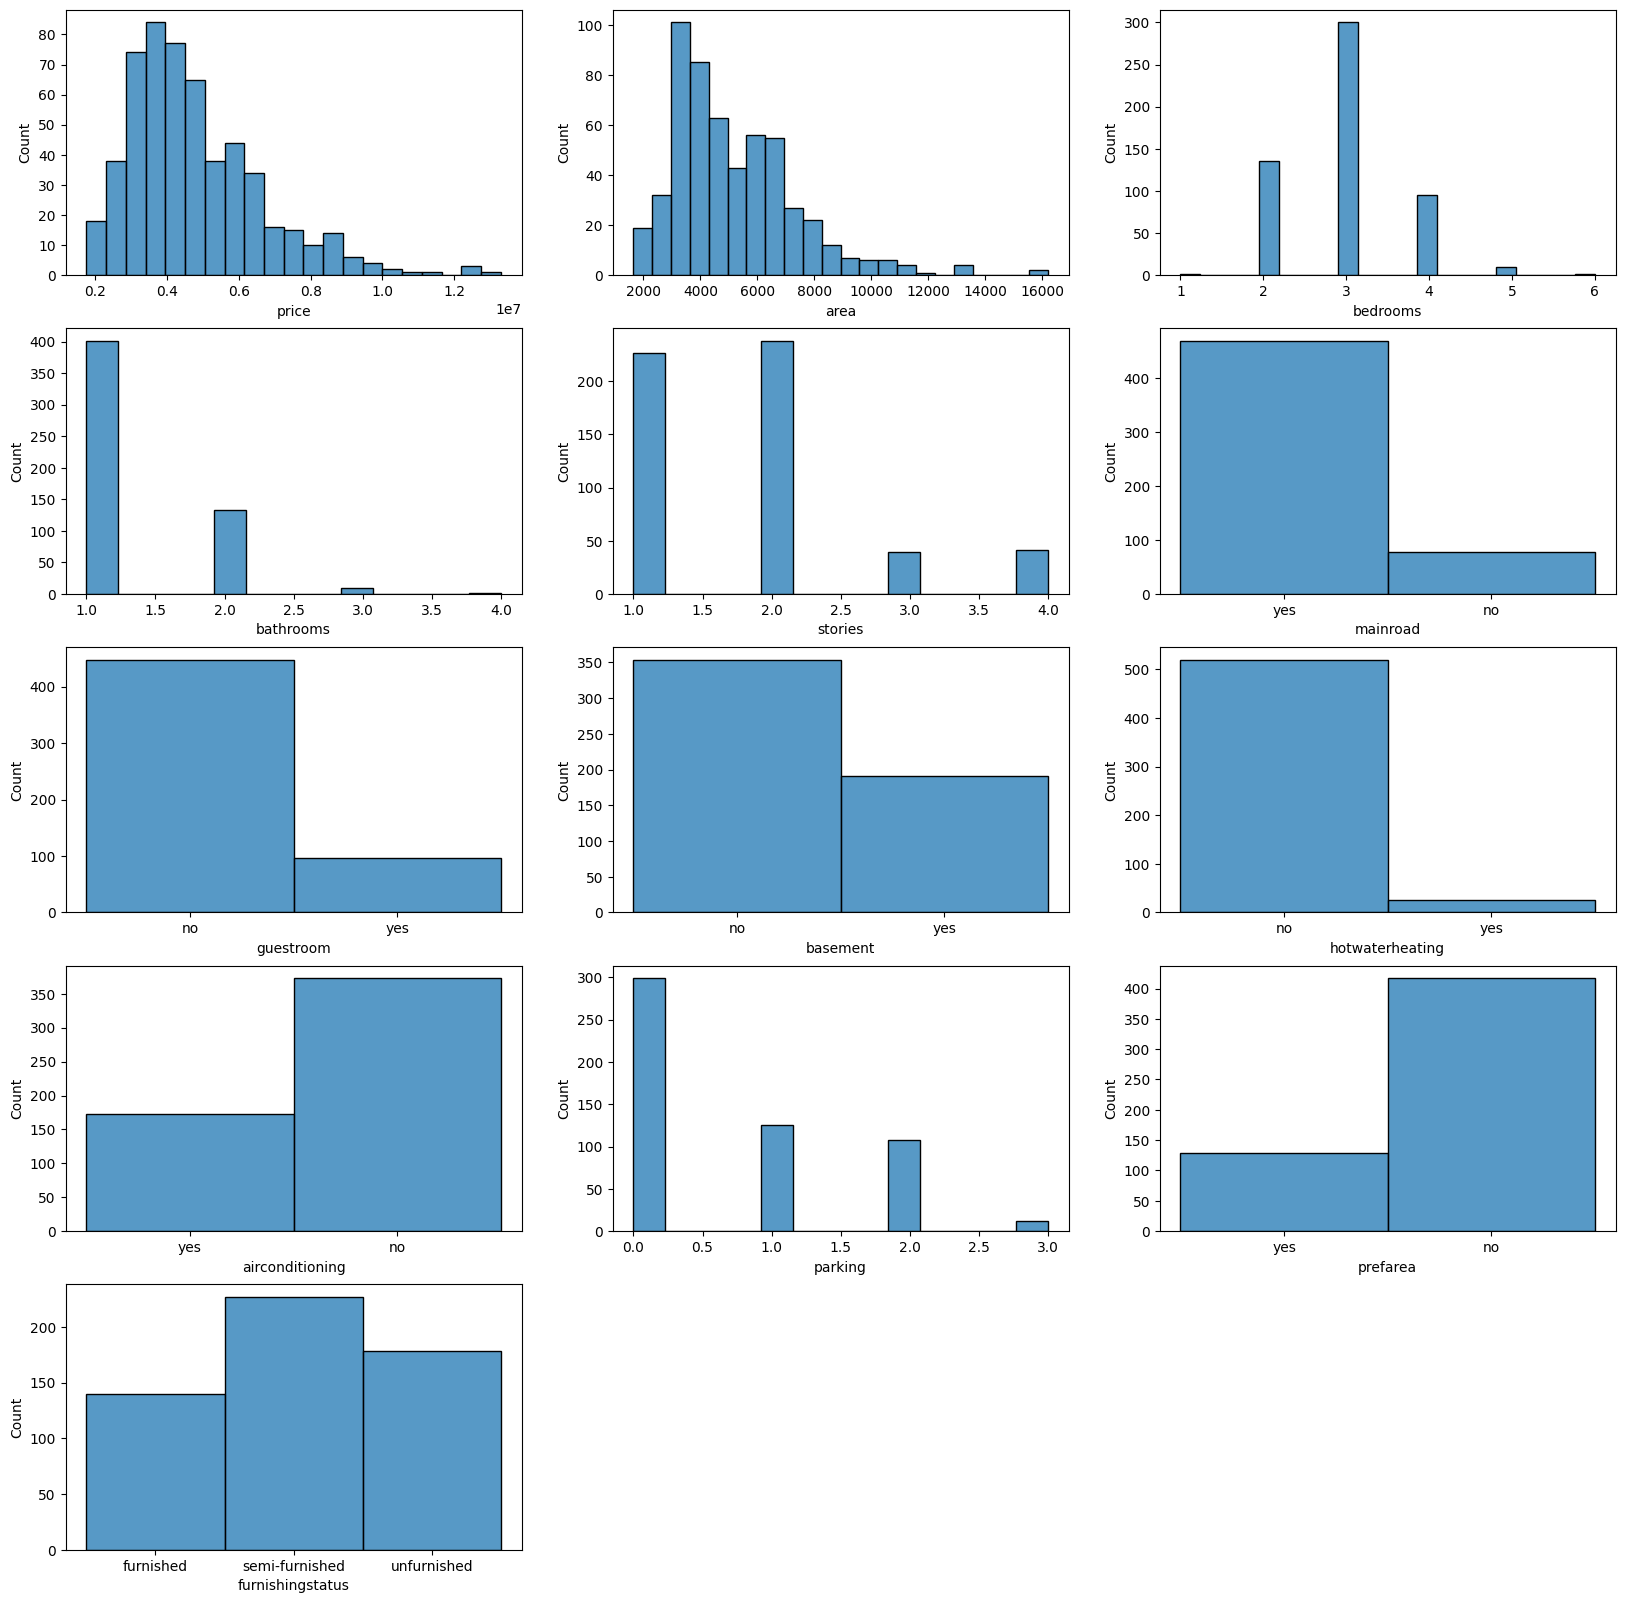

In [19]:
fig, axes = plt.subplots(5,3, figsize=(20,20))

for ax in axes.flatten():
    ax.set_axis_off()

for col, ax in zip(df.columns, axes.flatten()):
    ax.set_axis_on()
    sns.histplot(data=df, x=col, ax=ax)

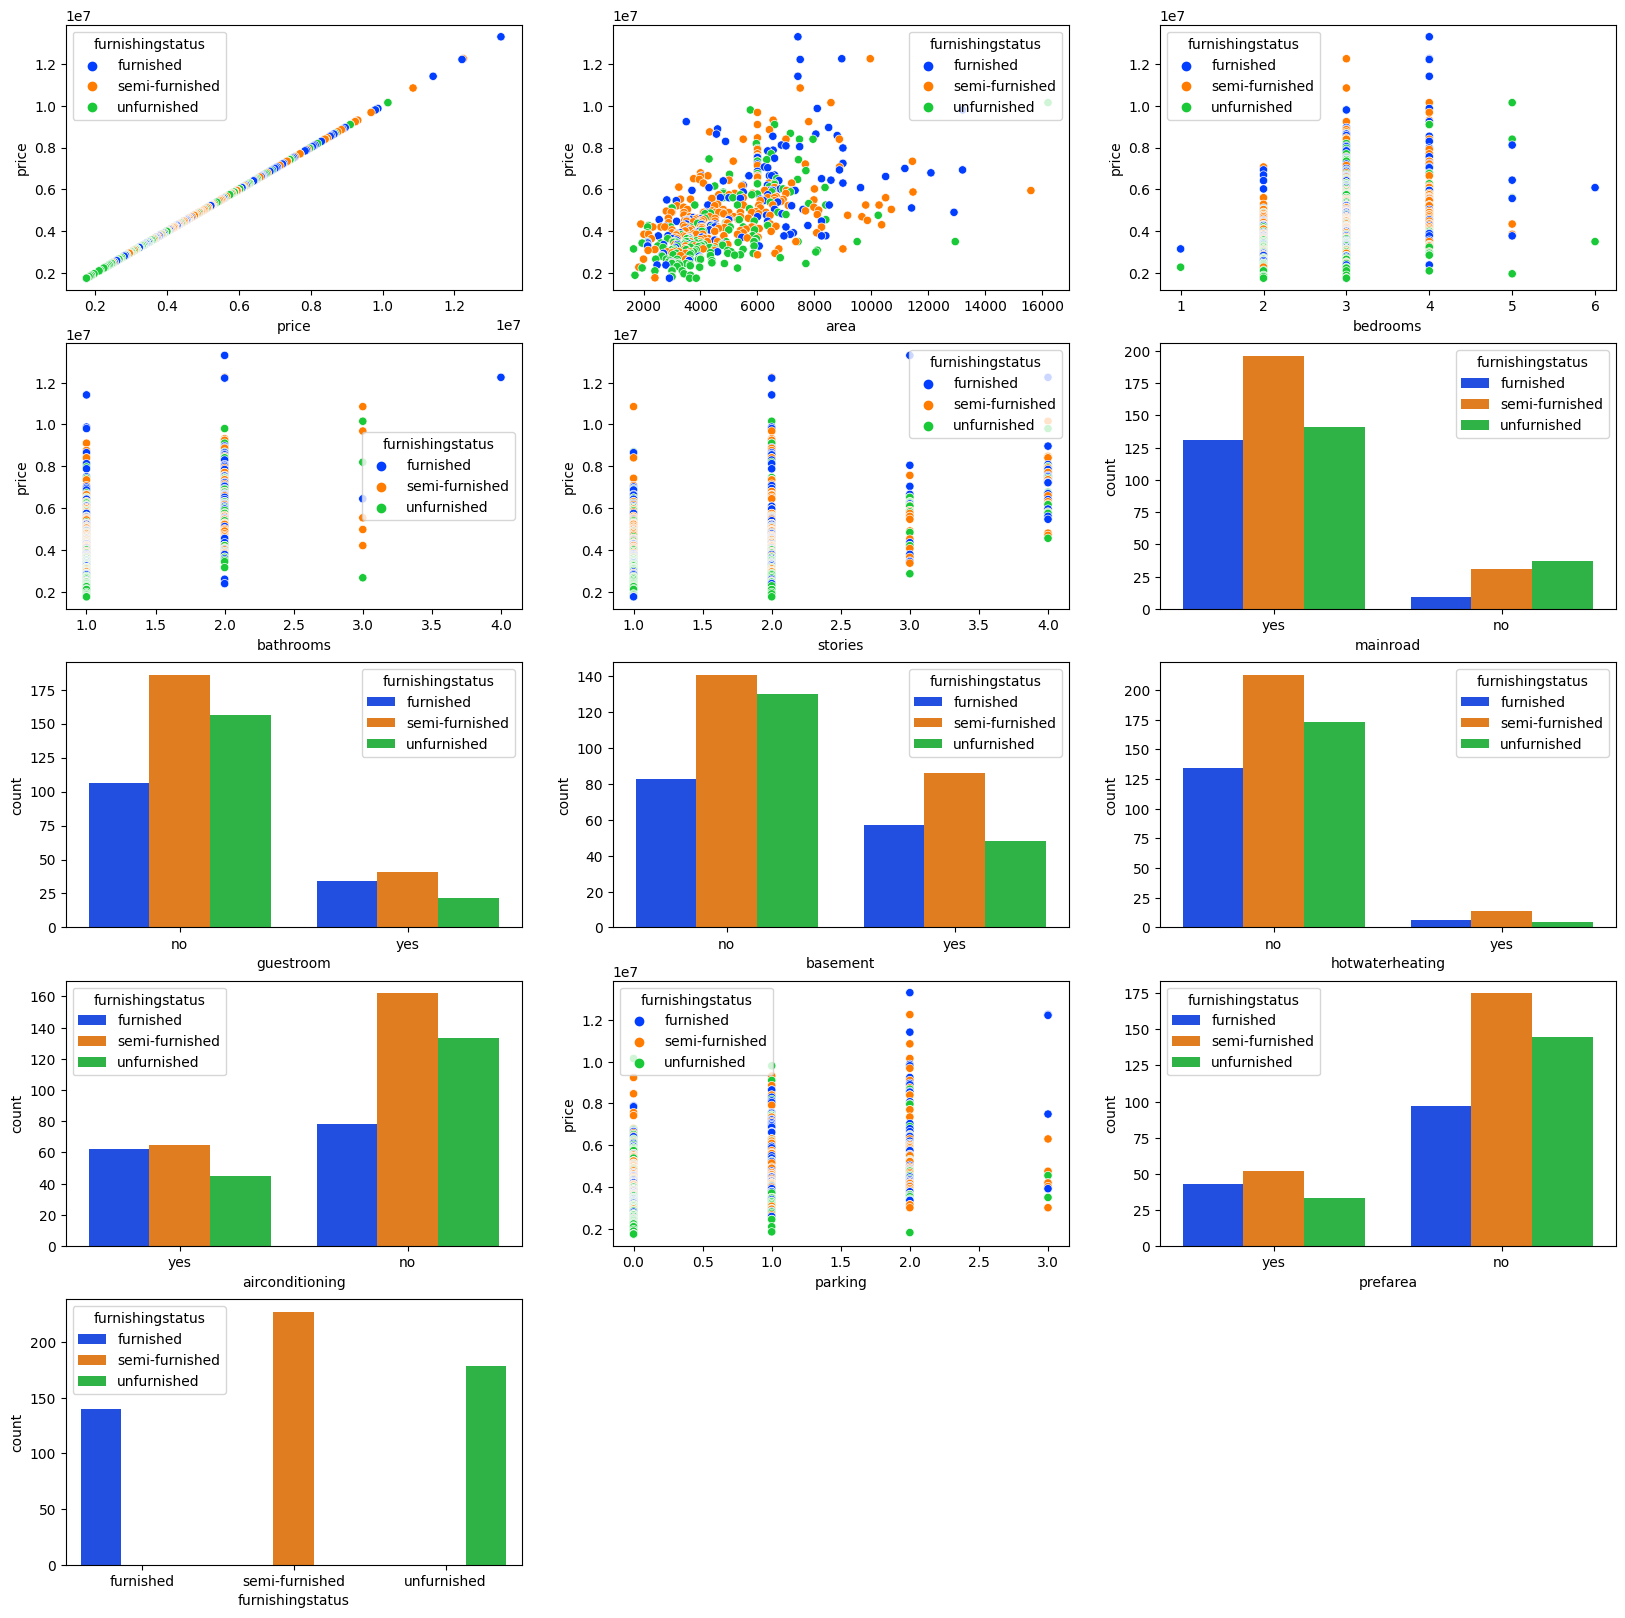

In [20]:
fig, axes = plt.subplots(5,3, figsize=(20,20))

for ax in axes.flatten():
    ax.set_axis_off()

for col, ax in zip(df.columns, axes.flatten()):
    ax.set_axis_on()
    if col in cat_cols:
        sns.countplot(data=df, x=col, ax=ax, hue='furnishingstatus', palette='bright')
    else:
        sns.scatterplot(data=df, x=col, y='price', ax=ax, hue='furnishingstatus', palette='bright')

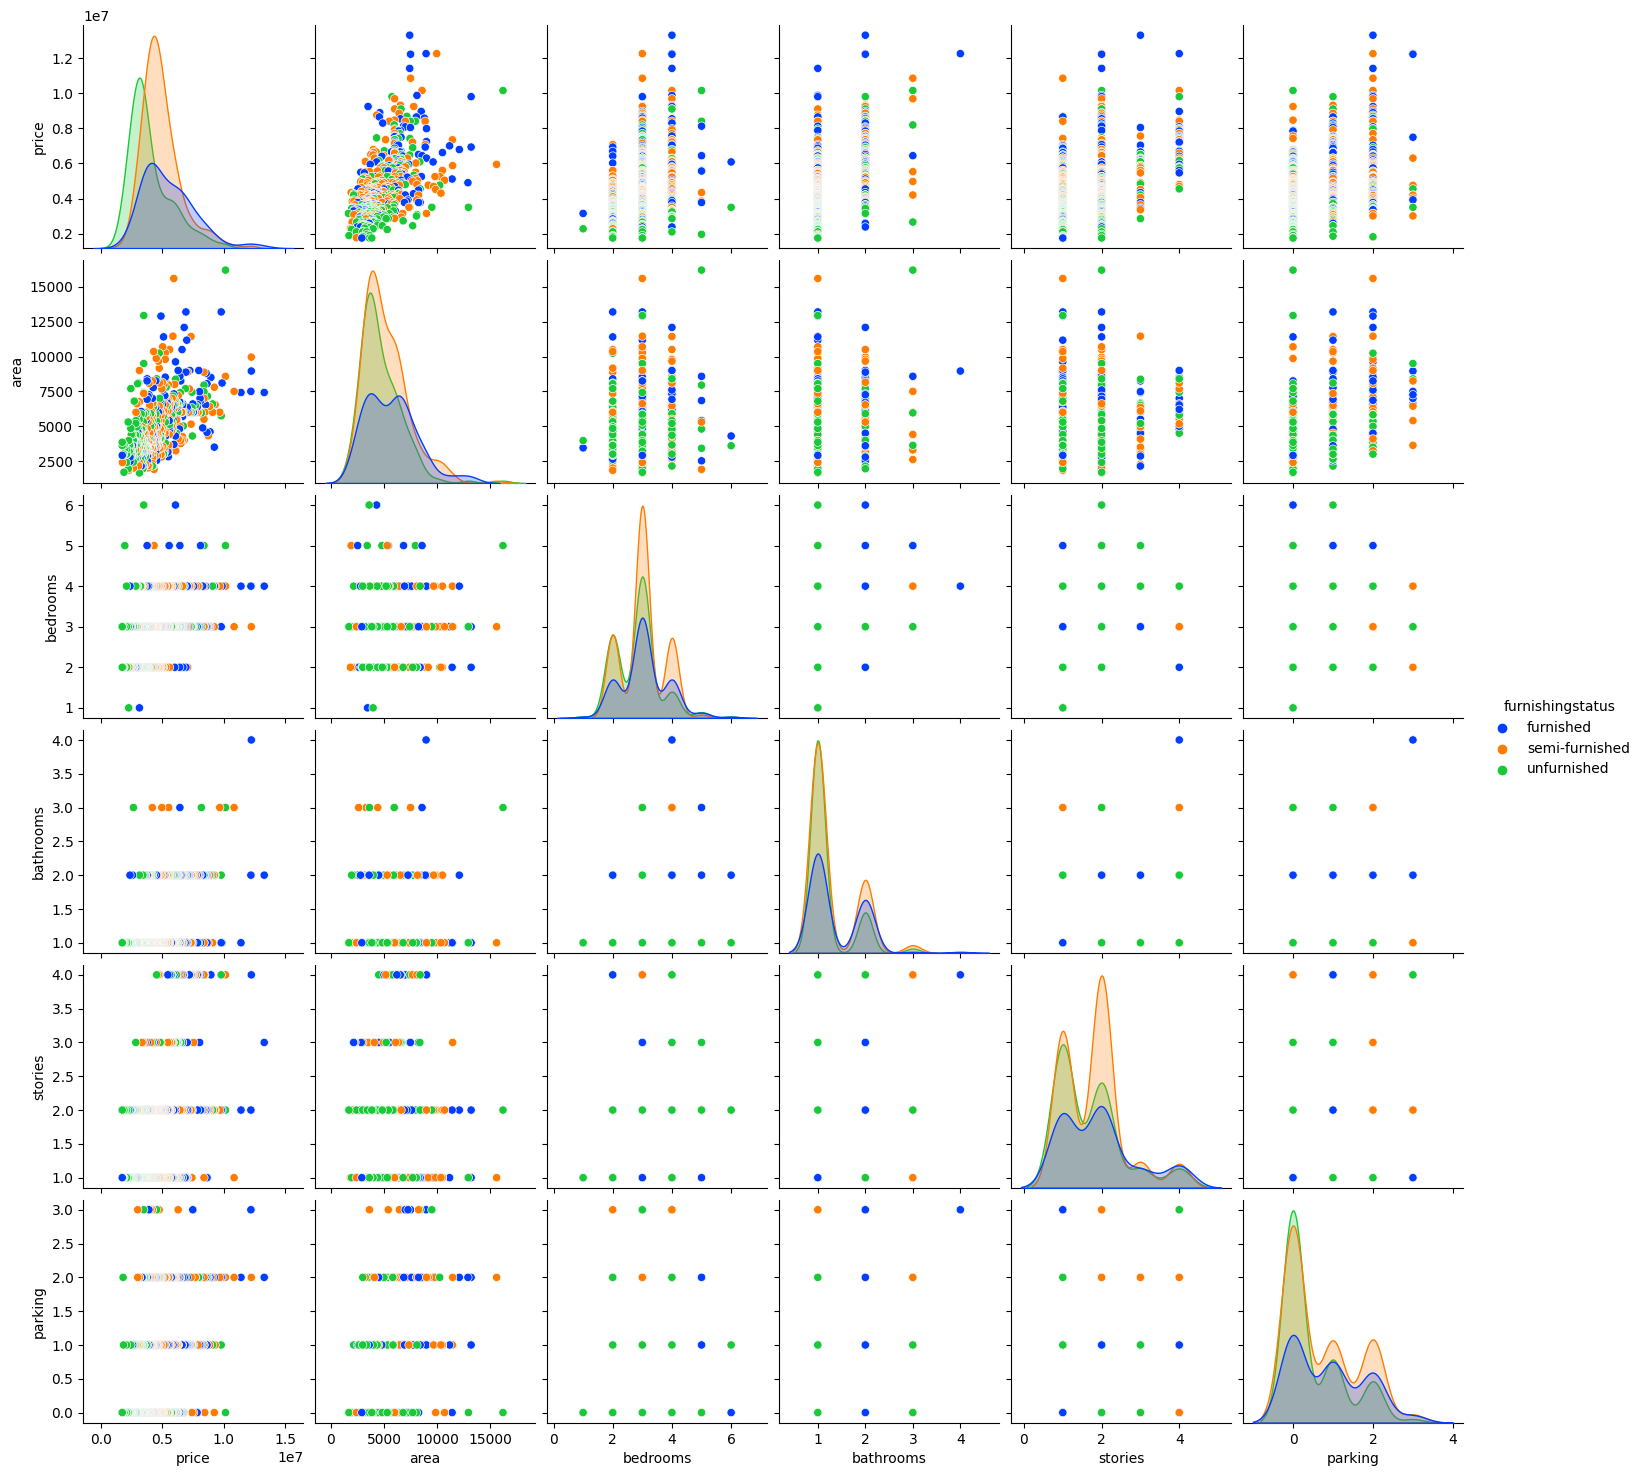

In [21]:
sns.pairplot(data=df, hue='furnishingstatus', palette='bright')

## Preprocessing

In [22]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [23]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print('*'*50)
    print(f'FEATURE :', col)
    print('='*50)
    print('BEFORE')
    print('-'*50)
    print(df[col].value_counts())
    print('-'*50)
    print('AFTER')
    print('-'*50)
    print(df_encoded[col].value_counts())

**************************************************
FEATURE : mainroad
BEFORE
--------------------------------------------------
yes    468
no      77
Name: mainroad, dtype: int64
--------------------------------------------------
AFTER
--------------------------------------------------
1    468
0     77
Name: mainroad, dtype: int64
**************************************************
FEATURE : guestroom
BEFORE
--------------------------------------------------
no     448
yes     97
Name: guestroom, dtype: int64
--------------------------------------------------
AFTER
--------------------------------------------------
0    448
1     97
Name: guestroom, dtype: int64
**************************************************
FEATURE : basement
BEFORE
--------------------------------------------------
no     354
yes    191
Name: basement, dtype: int64
--------------------------------------------------
AFTER
--------------------------------------------------
0    354
1    191
Name: basement, dtype: i

# Baseline Modeling

#1. Without Scaling

In [24]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_preds = svr.predict(X_test)

print('METRICS')
print('R2_SCORE :', r2_score(y_test, y_preds))
print('MSE :', mean_squared_error(y_test, y_preds))

METRICS
R2_SCORE : 0.3476760485190763
MSE : 2013388415845.5603


In [25]:
svr = SVR()
svr.fit(X_train, y_train)
y_preds = svr.predict(X_test)

print('METRICS')
print('R2_SCORE :', r2_score(y_test, y_preds))
print('MSE :', mean_squared_error(y_test, y_preds))

METRICS
R2_SCORE : -0.018863514701085382
MSE : 3144707461944.002


In [26]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

print('METRICS')
print('R2_SCORE :', r2_score(y_test, y_preds))
print('MSE :', mean_squared_error(y_test, y_preds))

METRICS
R2_SCORE : 0.5571670479910155
MSE : 1366797484141.8281


<Axes: >

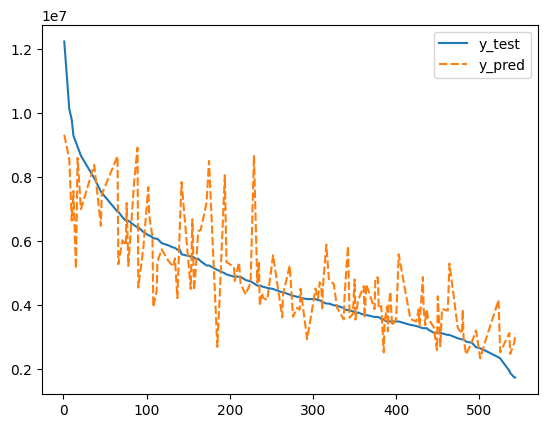

In [29]:
preds = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_preds
})
# preds['MA_pred'] = preds['y_pred'].rolling(window=100).mean()

sns.lineplot(data=preds)

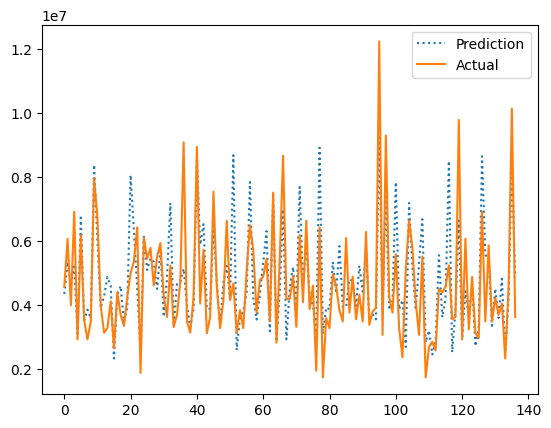

In [30]:
plt.plot(np.arange(len(y_preds)), y_preds, linestyle = 'dotted', label='Prediction')
plt.plot(np.arange(len(y_preds)), y_test, label='Actual')

plt.legend()
plt.show()

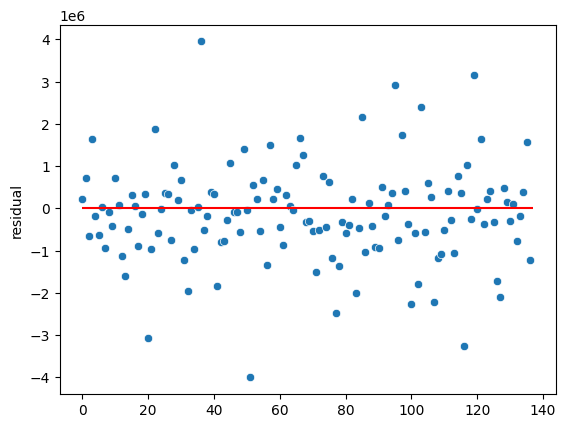

In [31]:
preds['residual'] = preds['y_test'] - preds['y_pred']

sns.scatterplot(data=preds, y='residual', x=np.arange(len(preds['y_pred'])))
plt.hlines(y=0, xmin=0, xmax=len(preds['y_pred']), color='red')

#2. Min-Max Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

sca = MinMaxScaler()
X_train_scaled = sca.fit_transform(X_train)
X_test_scaled = sca.transform(X_test)

In [33]:
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
y_preds = svr.predict(X_test_scaled)

print('METRICS')
print('R2_SCORE :', r2_score(y_test, y_preds))
print('MSE :', mean_squared_error(y_test, y_preds))

METRICS
R2_SCORE : -0.018822583072405363
MSE : 3144581127065.6973


In [34]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_preds = svr.predict(X_test_scaled)

print('METRICS')
print('R2_SCORE :', r2_score(y_test, y_preds))
print('MSE :', mean_squared_error(y_test, y_preds))

METRICS
R2_SCORE : -0.018868043021780467
MSE : 3144721438540.1553


In [35]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train_scaled, y_train)
y_preds = rf.predict(X_test_scaled)

print('METRICS')
print('R2_SCORE :', r2_score(y_test, y_preds))
print('MSE :', mean_squared_error(y_test, y_preds))

METRICS
R2_SCORE : 0.5576001719315372
MSE : 1365460653380.8354


# 3. One-Hot Encoding

In [36]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [37]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=cat_cols)
df_onehot

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [38]:
X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(df_onehot.drop(['price'], axis=1), df_onehot['price'], random_state=0)

sca = MinMaxScaler()
X_train_one_hot = sca.fit_transform(X_train_one_hot)
X_test_one_hot = sca.transform(X_test_one_hot)

svr = SVR(kernel='linear')
svr.fit(X_train_one_hot, y_train_one_hot)
y_preds = svr.predict(X_test_one_hot)

print('METRICS')
print('R2_SCORE :', r2_score(y_test_one_hot, y_preds))
print('MSE :', mean_squared_error(y_test_one_hot, y_preds))

METRICS
R2_SCORE : -0.018778318207952616
MSE : 3144444504203.519


In [39]:
svr = SVR()
svr.fit(X_train_one_hot, y_train_one_hot)
y_preds = svr.predict(X_test_one_hot)

print('METRICS')
print('R2_SCORE :', r2_score(y_test_one_hot, y_preds))
print('MSE :', mean_squared_error(y_test_one_hot, y_preds))

METRICS
R2_SCORE : -0.018871111921572092
MSE : 3144730910654.855


In [40]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train_one_hot, y_train_one_hot)
y_preds = rf.predict(X_test_one_hot)

print('METRICS')
print('R2_SCORE :', r2_score(y_test_one_hot, y_preds))
print('MSE :', mean_squared_error(y_test_one_hot, y_preds))

METRICS
R2_SCORE : 0.5411316046560429
MSE : 1416290647439.4287


In [42]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


In [43]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(random_state=0, verbose=False)
cb.fit(X_train_one_hot, y_train_one_hot)
y_preds = cb.predict(X_test_one_hot)

print('METRICS')
print('R2_SCORE :', r2_score(y_test_one_hot, y_preds))
print('MSE :', mean_squared_error(y_test_one_hot, y_preds))

METRICS
R2_SCORE : 0.5856683261573103
MSE : 1278828702424.5


In [48]:
!pip install matplotlib-venn

In [49]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [54]:
!apt-get -qq install -y libarchive-dev

In [55]:
pip install -U libarchive

  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


In [57]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [58]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.5 MB/s eta 0:00:00


In [60]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.4 MB/s eta 0:00:00


In [61]:
import optuna
import numpy as np
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 10, 100)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 1.0, log=True)
    depth = trial.suggest_int("depth", 4, 10)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1e-9, 100, log=True)

    # Instantiate the CatBoostRegressor with suggested hyperparameters
    model = CatBoostRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_state=42,
        verbose=0
    )

    # Generate some example data (you can replace this with your own dataset)
    X, y = make_regression(n_samples=100, n_features=10, random_state=42)

    # Calculate cross-validated MSE scores
    mse_scores = -cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')

    # Calculate the mean of MSE scores
    mse_mean = np.mean(mse_scores)

    # Return the mean MSE
    return mse_mean

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2023-08-22 04:35:05,151] A new study created in memory with name: no-name-1642a63f-f7a1-44d6-b6b8-31ccf6f97592
[I 2023-08-22 04:35:05,570] Trial 0 finished with value: 32987.184415734206 and parameters: {'n_estimators': 30, 'learning_rate': 0.008390747635678963, 'depth': 7, 'l2_leaf_reg': 0.15691240050400557}. Best is trial 0 with value: 32987.184415734206.
[I 2023-08-22 04:35:05,985] Trial 1 finished with value: 29710.444317115733 and parameters: {'n_estimators': 70, 'learning_rate': 0.005120496644821219, 'depth': 5, 'l2_leaf_reg': 3.614191147377817e-05}. Best is trial 1 with value: 29710.444317115733.
[I 2023-08-22 04:35:06,964] Trial 2 finished with value: 34537.6065555692 and parameters: {'n_estimators': 38, 'learning_rate': 0.00405268214969218, 'depth': 8, 'l2_leaf_reg': 3.6619874716106855e-07}. Best is trial 1 with value: 29710.444317115733.
[I 2023-08-22 04:35:07,214] Trial 3 finished with value: 27828.69111135506 and parameters: {'n_estimators': 23, 'learning_rate': 0.019957

Number of finished trials:  10
Best trial:
Value:  18512.918806437414
Params: 
    n_estimators: 73
    learning_rate: 0.030746913114316092
    depth: 7
    l2_leaf_reg: 0.00010881695947814449


In [62]:
best_params = trial.params

In [63]:
cb = CatBoostRegressor(random_state=0, verbose=False, **best_params)
cb.fit(X_train_one_hot, y_train_one_hot)
y_preds = cb.predict(X_test_one_hot)

print('METRICS')
print('R2_SCORE :', r2_score(y_test_one_hot, y_preds))
print('MSE :', mean_squared_error(y_test_one_hot, y_preds))

METRICS
R2_SCORE : 0.6115725723826009
MSE : 1198875622129.3389


In [64]:
df_onehot.shape

(545, 21)

<Axes: >

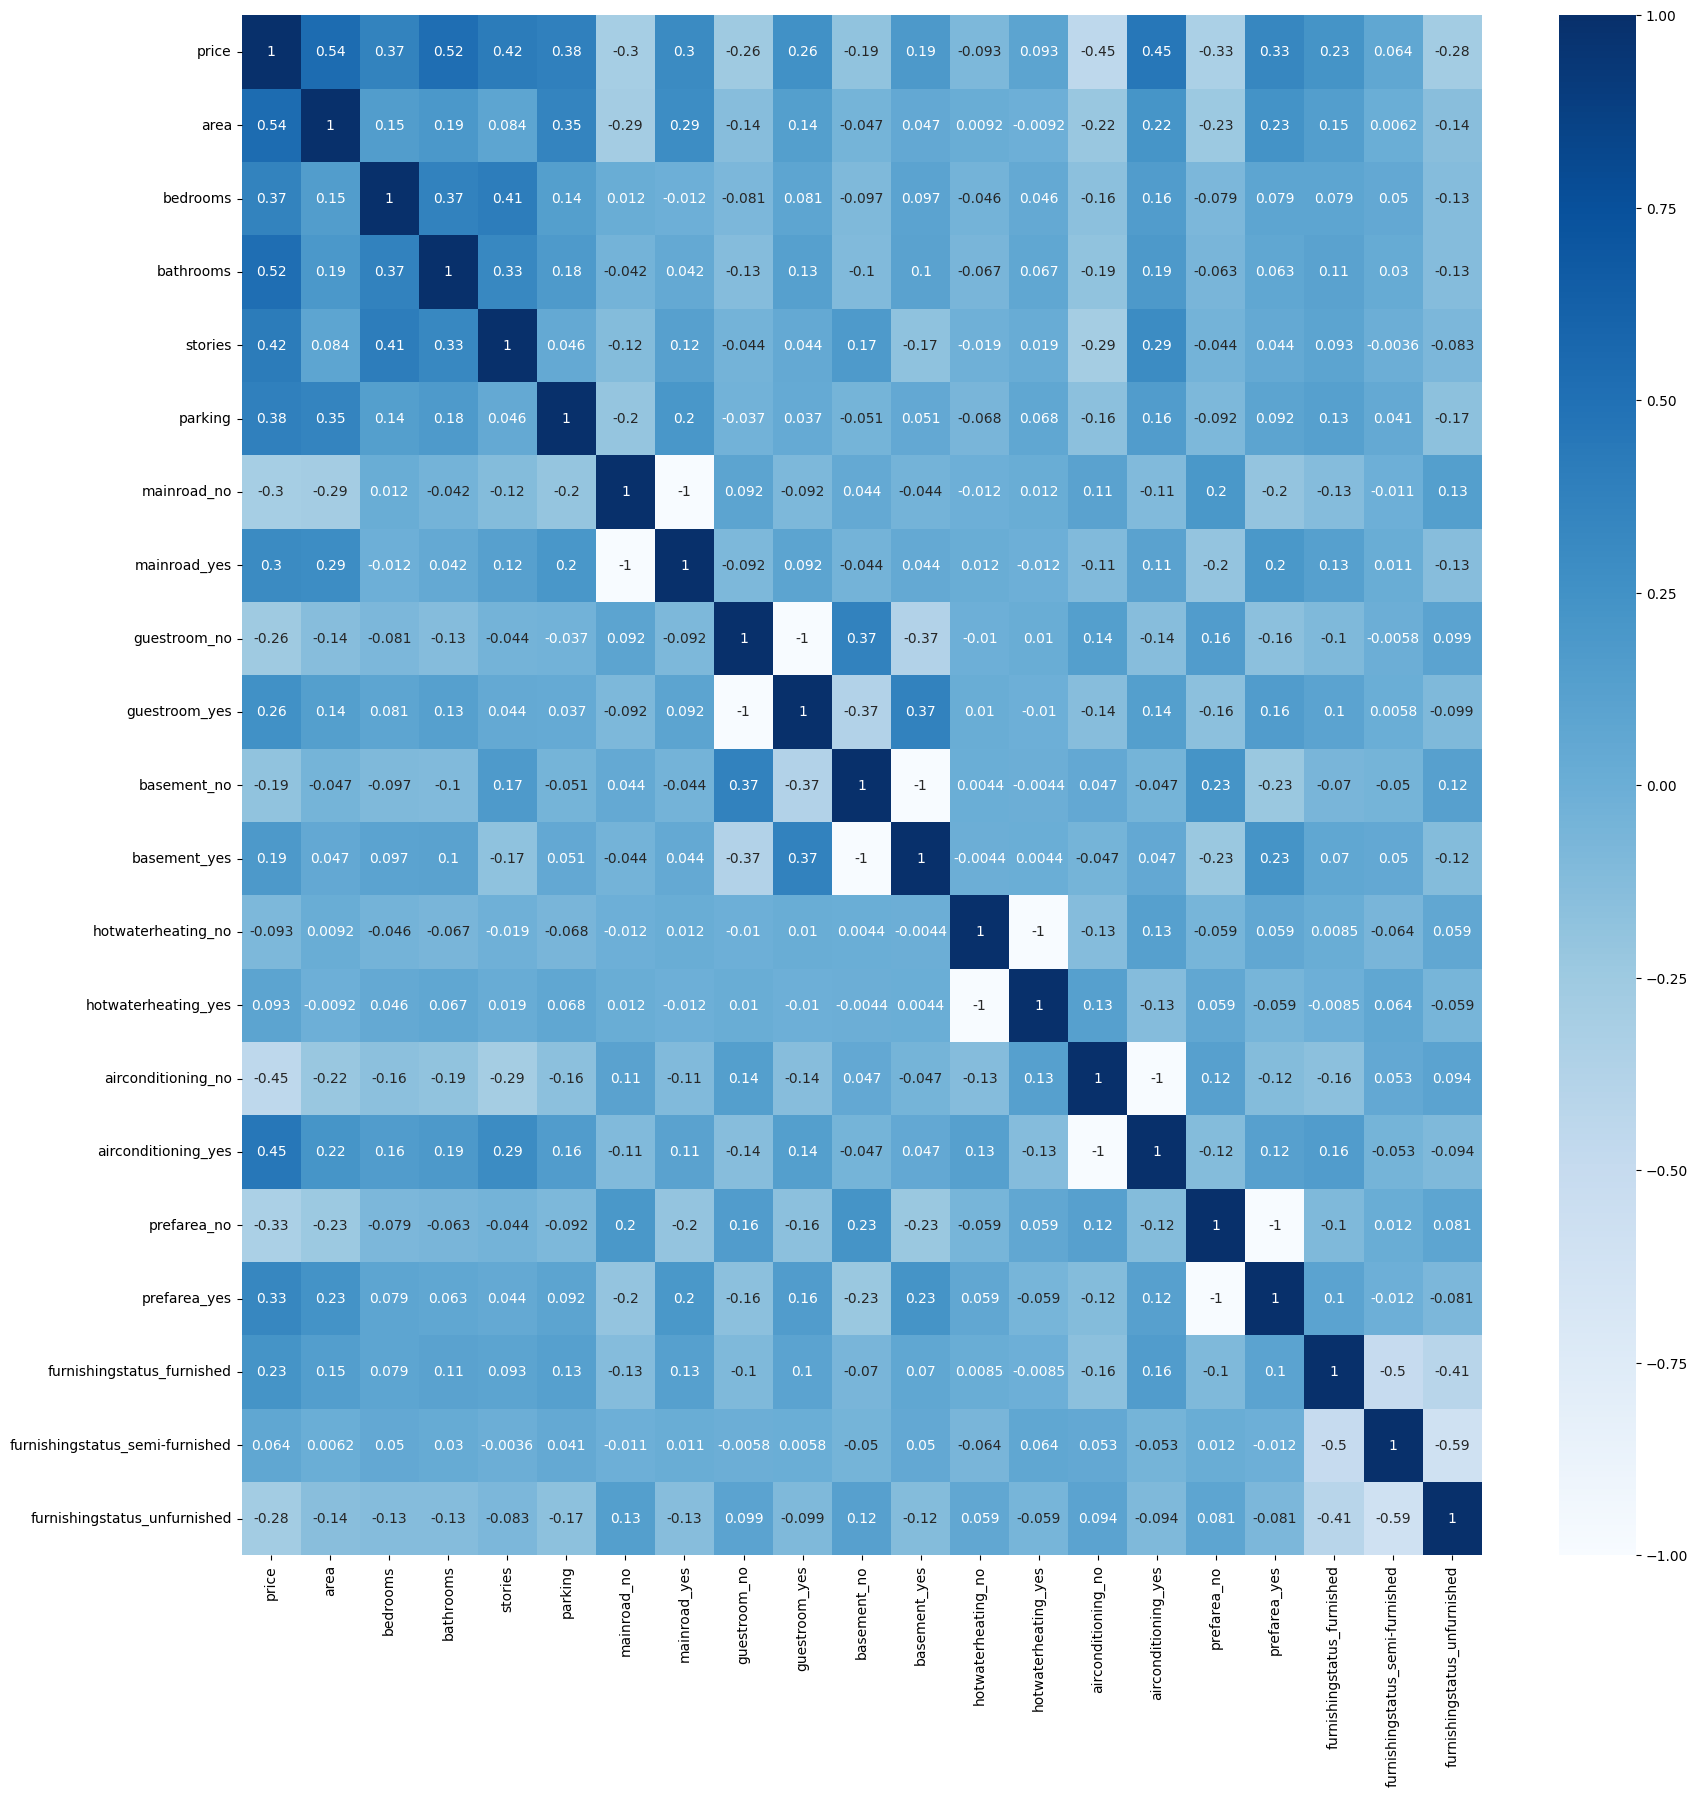

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df_onehot.corr(), annot=True, cmap='Blues')